In [ ]:
from google.colab import drive


drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/ieAI

/content/gdrive/MyDrive/ieAI


In [ ]:
!git clone https://github.com/satchitchatterji/DistillNAM.git

fatal: destination path 'DistillNAM' already exists and is not an empty directory.


In [ ]:
%cd DistillNAM
!pip install -r requirements.txt

/content/gdrive/MyDrive/ieAI/DistillNAM
  Cloning https://github.com/PytorchLightning/lightning-bolts.git (to revision master) to /tmp/pip-install-w17p92m4/lightning-bolts_8d997ff0bdcf448a8466da158e42063c
  Running command git clone --filter=blob:none --quiet https://github.com/PytorchLightning/lightning-bolts.git /tmp/pip-install-w17p92m4/lightning-bolts_8d997ff0bdcf448a8466da158e42063c
  Resolved https://github.com/PytorchLightning/lightning-bolts.git to commit 30856887ccce3450433417336dbc2d5bcbe5eda9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import os

import models
import pandas as pd
import pytorch_lightning as L
import seaborn as sns
import torch
from pl_bolts.datamodules import MNISTDataModule
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger
from torch.nn import functional as F
from torchmetrics.functional import accuracy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.10/dist-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


In [ ]:
# reproducibility
SEED = 42
L.seed_everything(SEED)

INFO:lightning_fabric.utilities.seed:Global seed set to 42


42

In [ ]:
PATH_DATASETS = "~/datasets"
BATCH_SIZE = 256 if torch.cuda.is_available() else 64
NUM_WORKERS = int(os.cpu_count() / 2)
PL_ROOT_DIR = "./MNIST_CNN"
print(
    f"Datasets root: {PATH_DATASETS} batch size: {BATCH_SIZE} n_workers: {NUM_WORKERS} lightning dir: {PL_ROOT_DIR}"
)


Datasets root: ~/datasets batch size: 64 n_workers: 1 lightning dir: ./MNIST_CNN


In [ ]:
mnist_dm = MNISTDataModule(
    PATH_DATASETS, normalize=True, num_workers=NUM_WORKERS, batch_size=BATCH_SIZE
)
mnist_dm

<pl_bolts.datamodules.mnist_datamodule.MNISTDataModule>

In [ ]:
model = models.LitMNIST()
model

LitMNIST(
  (model): MNISTCnn(
    (conv1): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (conv2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (dropout): Dropout(p=0.5, inplace=False)
    (classifier): Linear(in_features=1600, out_features=10, bias=True)
  )
)

In [ ]:
trainer = L.Trainer(
    default_root_dir=PL_ROOT_DIR,
    max_epochs=10,
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,
    logger=CSVLogger(save_dir=PL_ROOT_DIR),
    callbacks=[
        TQDMProgressBar(refresh_rate=10),
        EarlyStopping(monitor="val_loss", mode="min"),
    ],
)
trainer

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


<pytorch_lightning.trainer.trainer.Trainer>

In [ ]:
trainer.fit(model, datamodule=mnist_dm)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type     | Params
-----------------------------------
0 | model | MNISTCnn | 34.8 K
-----------------------------------
34.8 K    Trainable params
0         Non-trainable params
34.8 K    Total params
0.139     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
trainer.test(model, datamodule=mnist_dm)

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9909999966621399     │
│         test_loss         │   0.026685131713747978    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.026685131713747978, 'test_acc': 0.9909999966621399}]

In [ ]:
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
metrics.head()


,train_loss,epoch,step,val_loss,val_acc,test_loss,test_acc
0,0.423975,0,49,NaN,NaN,NaN,NaN
1,0.206262,0,99,NaN,NaN,NaN,NaN
2,0.209739,0,149,NaN,NaN,NaN,NaN
3,0.302645,0,199,NaN,NaN,NaN,NaN
4,0.281258,0,249,NaN,NaN,NaN,NaN


In [ ]:
del metrics["step"]
metrics.set_index("epoch", inplace=True)
metrics.dropna(axis=1, how="all").head()

,train_loss,val_loss,val_acc,test_loss,test_acc
epoch,,,,,
0,0.423975,NaN,NaN,NaN,NaN
0,0.206262,NaN,NaN,NaN,NaN
0,0.209739,NaN,NaN,NaN,NaN
0,0.302645,NaN,NaN,NaN,NaN
0,0.281258,NaN,NaN,NaN,NaN


<seaborn.axisgrid.FacetGrid>

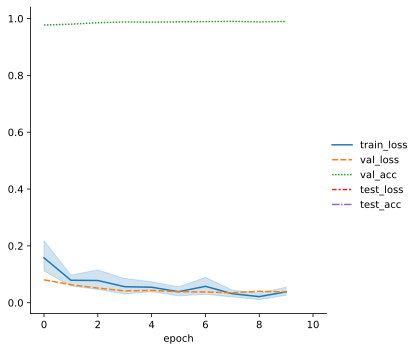

In [ ]:
sns.relplot(data=metrics, kind="line")